In [11]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import pickle

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve

In [12]:
# adjust jupyter notebook cell width [%]
cell_width = 80
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:" + str(cell_width) + "% !important; }</style>"))

In [13]:
## for long cell execution, call this method as a last command in the cell
from IPython.display import Audio, display
def all_done():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

# Loading Data

In [14]:
# filepath = '../data/campaign_768874.log' # DS1
filepath = '../data/campaign_821471.log' # DS2
# filepath = '../data/creative_5188417.log' # DS3

df = pd.read_csv(filepath, sep='\t')

# Exp analysis

In [15]:
# #Drop 
# to_drop = ['advertiser_id','campaign_id','country_code','content_category_ids','url_category_ids','project_id']
# temp_drop = ['dma','url_category_ids', 'content_category_ids' ]

# #??? dma

# #Categorical
# cal_cols = ['creative_id','keyword_id','state','organization','browser_ver','platform','network','location_id','request_tld','ad_blocker','hour','day_of_week']

# #Numerical
# num_cols = ["install_week"]

# #Feature eng
# #bin dma
# #simplify browser, polatform, hour, day_of_week 
# #multy hot key url_category_ids, content_category_ids

In [16]:
df.head(100)

,label,advertiser_id,campaign_id,creative_id,keyword_id,country_code,state,dma,organization,browser_ver,...,network,location_id,request_tld,ad_blocker,hour,day_of_week,install_week,content_category_ids,url_category_ids,project_id
0,0,276,821471,11591213,43223832.0,US,NJ,501,Optimum Online,Chrome 63,...,W127,6871,search.yahoo.com,0,3,4,418,0,20035|20035|20035|20035,146
1,0,276,821471,11591213,65162591.0,US,NY,526,Time Warner Cable,Chrome 63,...,WL19,0,listenradios.com,0,3,4,320,0,2005,0
2,0,276,821471,11595954,NaN,US,MT,762,Spectrum,Firefox 58,...,W127,0,settingforfour.com,0,1,4,429,20031|902,902,0
3,0,276,821471,11597005,2257363.0,US,CA,862,AT&T U-verse,Chrome 63,...,W103,4497,ebay.com,0,0,4,430,0,901|901,122
4,0,276,821471,11591213,43223832.0,US,IL,632,Hamilton County Communications,Chrome 63,...,W127,6758,bing.com,0,2,4,416,0,20035|20035,146
5,0,276,821471,11591213,157780014.0,US,OH,510,AT&T U-verse,Firefox 58,...,WL89,0,wksu.org,0,3,4,430,1104,2501,0
6,0,276,821471,11591213,43223832.0,US,NC,560,Time Warner Cable,Firefox 58,...,W114,6813,search.searchwfaa.com,0,4,4,419,0,20035,133
7,0,276,821471,11591213,43223832.0,US,CA,825,AT&T U-verse,Chrome 63,...,W146,6812,ext.ask.com,0,1,4,409,0,20035|20035,165
8,0,276,821471,11591213,43223832.0,US,WI,617,Spectrum,Chrome 63,...,WL96,4766,wclo.com,1,3,4,395,0,2501,115
9,1,276,821471,11595954,NaN,US,TX,661,Suddenlink Communications,Chrome 63,...,WL99,0,eazydownload.net,0,4,4,428,1104,20006,0


In [17]:
imbalance_weight = round(len(df)/len(df[df['label'] == 1]),2)
print('Number of Impressions: ', len(df))
print('Number of Conversions: ', len(df[df['label'] == 1]))
print('----------------------')
print('Percentage: ', round(1/imbalance_weight,4))
print('Imbalance weight: ', imbalance_weight)

Number of Impressions:  268710
Number of Conversions:  6230
----------------------
Percentage:  0.0232
Imbalance weight:  43.13


/Users/thedzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


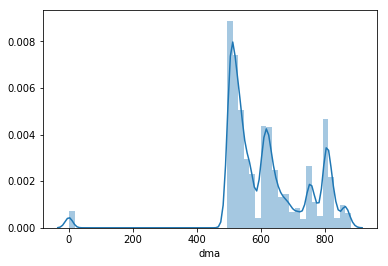

In [18]:
sns.distplot(df["dma"]);

/Users/thedzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


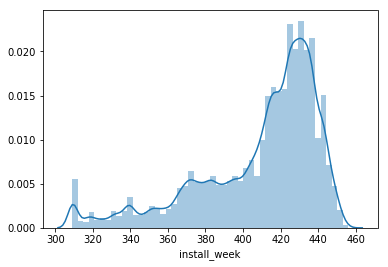

In [19]:
sns.distplot(df["install_week"]);

/Users/thedzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


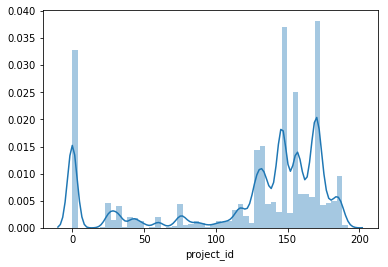

In [20]:
sns.distplot(df["project_id"]);

/Users/thedzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


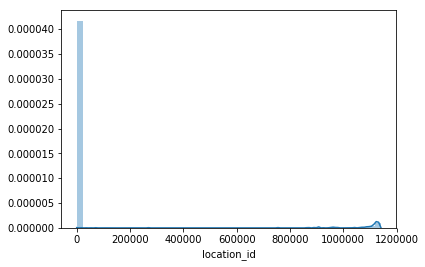

In [21]:
p= df
sns.distplot(p["location_id"]);

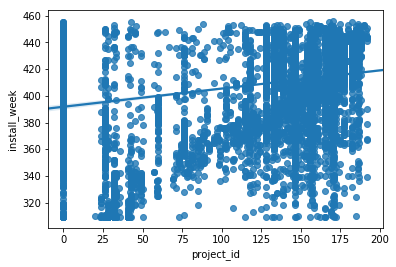

In [22]:
sns.regplot("project_id","install_week", data=df.sample(10000))

In [23]:
df.columns

Index(['label', 'advertiser_id', 'campaign_id', 'creative_id', 'keyword_id',
       'country_code', 'state', 'dma', 'organization', 'browser_ver',
       'platform', 'network', 'location_id', 'request_tld', 'ad_blocker',
       'hour', 'day_of_week', 'install_week', 'content_category_ids',
       'url_category_ids', 'project_id'],
      dtype='object')

In [24]:
print('creative_id:',df['creative_id'].nunique())
print('keyword_id:',df['keyword_id'].nunique())
print('dma:',df['dma'].nunique())
print('project_id:',df['project_id'].nunique())
print('install_week:',df['install_week'].nunique())
print('location_id:',df['location_id'].nunique())

creative_id: 10
keyword_id: 213
dma: 211
project_id: 144
install_week: 148
location_id: 7409


In [25]:
df.describe()

,label,advertiser_id,campaign_id,creative_id,keyword_id,dma,location_id,ad_blocker,hour,day_of_week,install_week,project_id
count,268710.000000,268710.0,268710.0,2.687100e+05,2.673940e+05,268710.000000,2.687100e+05,268710.000000,268710.000000,268710.000000,268710.000000,268710.000000
mean,0.023185,276.0,821471.0,1.159905e+07,9.839641e+07,615.315504,5.658788e+04,0.098057,14.463652,3.893130,408.854103,123.292293
std,0.150491,0.0,0.0,2.900026e+04,7.188922e+07,132.978032,2.296055e+05,0.297393,5.260805,1.991392,32.384240,58.798611
min,0.000000,276.0,821471.0,1.159121e+07,1.609200e+04,0.000000,0.000000e+00,0.000000,0.000000,1.000000,309.000000,0.000000
25%,0.000000,276.0,821471.0,1.159121e+07,1.170112e+07,524.000000,5.479000e+03,0.000000,10.000000,2.000000,393.000000,115.000000
50%,0.000000,276.0,821471.0,1.159121e+07,1.522403e+08,602.000000,6.344000e+03,0.000000,15.000000,4.000000,419.000000,146.000000
75%,0.000000,276.0,821471.0,1.159121e+07,1.666210e+08,709.000000,6.805000e+03,0.000000,19.000000,6.000000,432.000000,167.000000
max,1.000000,276.0,821471.0,1.170859e+07,1.671625e+08,881.000000,1.141576e+06,1.000000,23.000000,7.000000,456.000000,192.000000


In [26]:
# describe non-numerical columns
df.select_dtypes(exclude=[np.number]).describe()

,country_code,state,organization,browser_ver,platform,network,request_tld,content_category_ids,url_category_ids
count,268710,267108,268710,268710,268710,268710,268710,268710,268598
unique,1,56,4896,86,11,155,24845,256,823
top,US,CA,Comcast Cable,Chrome 65,Windows 10,W127,open.spotify.com,0,20006
freq,268710,32071,51538,65911,107580,38230,18007,246071,31352


In [27]:
########## observations ##########
# country_code, 1 -> drop
# state, 56 -> check
# organization, 4896 -> check
# browser_ver, 86 -> check
# platform, 11 -> convert
# network, 155 -> check, reduce
# request_tld, 24845 -> check
# content_category_ids, url_category_ids -> list, check for one-hot, redundancy etc.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268710 entries, 0 to 268709
Data columns (total 21 columns):
label                   268710 non-null int64
advertiser_id           268710 non-null int64
campaign_id             268710 non-null int64
creative_id             268710 non-null int64
keyword_id              267394 non-null float64
country_code            268710 non-null object
state                   267108 non-null object
dma                     268710 non-null int64
organization            268710 non-null object
browser_ver             268710 non-null object
platform                268710 non-null object
network                 268710 non-null object
location_id             268710 non-null int64
request_tld             268710 non-null object
ad_blocker              268710 non-null int64
hour                    268710 non-null int64
day_of_week             268710 non-null int64
install_week            268710 non-null int64
content_category_ids    268710 non-null object
url_c

## NaN Values

In [29]:
# check for columns containing 'nan' values

null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

keyword_id          1316
state               1602
url_category_ids     112
dtype: int64

In [30]:
# print the rows contaning null values
len(df[df.isnull().any(axis=1) & df['label']==1])

167

In [31]:
ind_list = df[df.isnull().any(axis=1)][null_columns].index
df_nan = df.iloc[ind_list]
df_nan[df_nan['label'] == 1] # 167 observations that have 'label' == 1,  167/6230 = 0.027% of the whole class

,label,advertiser_id,campaign_id,creative_id,keyword_id,country_code,state,dma,organization,browser_ver,...,network,location_id,request_tld,ad_blocker,hour,day_of_week,install_week,content_category_ids,url_category_ids,project_id
9,1,276,821471,11595954,NaN,US,TX,661,Suddenlink Communications,Chrome 63,...,WL99,0,eazydownload.net,0,4,4,428,1104,20006,0
11,1,276,821471,11595954,NaN,US,WA,819,CenturyLink,Chrome 63,...,W114,6817,onlinebiblepassages.com,0,2,4,425,2102,2101,133
34,1,276,821471,11595954,NaN,US,RI,521,Verizon Fios,Chrome 63,...,W158,6782,inewsreader.net,0,7,4,426,0,2501,177
47,1,276,821471,11595954,NaN,US,PA,511,Comcast Cable,Firefox 58,...,W138,6803,www1.cbn.com,0,8,4,416,2005,2101|2101,157
158,1,276,821471,11595954,NaN,US,IL,602,Comcast Cable,Chrome 63,...,W127,6800,easytemplatemanager.com,0,9,4,427,0,20006,146
187,1,276,821471,11595954,NaN,US,NE,722,University of Nebraska,Chrome 63,...,WL99,6257,thesims3.com,0,10,4,419,0,802|802,118
252,1,276,821471,11595954,NaN,US,FL,534,Spectrum,Chrome 63,...,W127,6759,easytemplatemanager.com,0,12,4,415,0,20006,146
272,1,276,821471,11595954,NaN,US,MN,613,Spectrum,Chrome 63,...,W152,6344,cardgamesolitaire.com,1,11,4,414,802,801,171
297,1,276,821471,11595954,NaN,US,KS,605,Cox Communications,Firefox 58,...,W114,6817,clothpaperscissors.com,0,11,4,424,2005,20005,133
321,1,276,821471,11595954,NaN,US,PA,514,Comcast Cable,Chrome 63,...,W127,6780,download.cnet.com,0,13,4,410,20006|802,1102|1102|20006|20006,146


## Unique values

In [32]:
df['creative_id'].unique()

array([11591213, 11595954, 11597005, 11591985, 11636129, 11661594,
       11636784, 11658852, 11708589, 11708590])

In [33]:
df['project_id'].unique()

array([146,   0, 122, 133, 165, 115,  42, 130, 171, 156, 177, 175, 157,
       150, 132,  32, 139, 117,  88, 140,  28, 158,  91, 118, 169, 167,
        26, 141,  60, 145, 153, 143, 182, 120, 128, 136,  24,  49, 161,
        85, 110, 107, 170, 144, 172, 168, 116, 152, 103,  76,  50, 154,
       174, 160, 102, 112, 186, 155,  59,  41, 109, 125,  71, 149,  45,
       162,  43,  89, 111,  33,  64, 135, 151,  98,  81, 142,  78, 147,
        74, 148,  95,  86, 129, 166, 104, 137,  36,  92,  77,  23,  29,
        67, 173, 124,  69,  99,  84,  21,  61,  97,  73,  87,  82,  68,
        46,  47,  96,  79,  72,  83, 159,  94,  70, 138,  57, 121, 131,
        20, 123, 126,  80, 101, 134,  44,  56,  75, 108, 119, 105, 163,
       164, 188, 187, 184,  35, 180,  39,  31, 185, 192,  63, 191, 189,
       190])

In [34]:
# sns.stripplot(x="label", y="SalePrice", data=df)

## Cross correlation

In [35]:
# use only numerical columns
df_num = df.select_dtypes(include=[np.number])

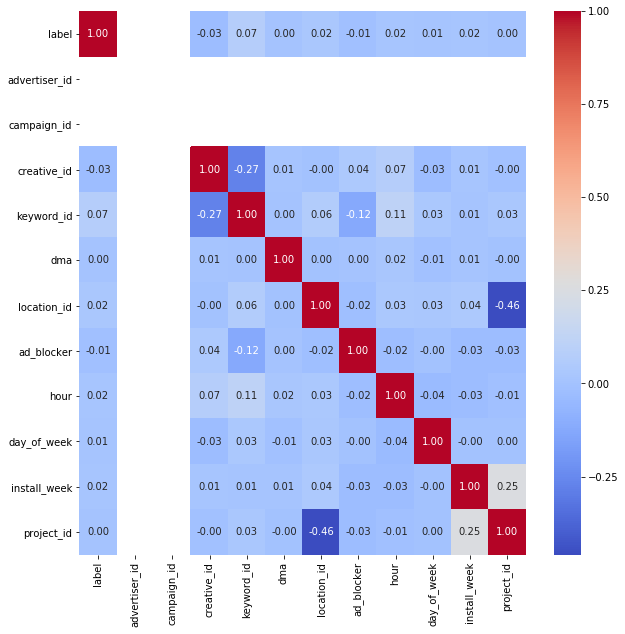

In [36]:
# Correlation matrix between numerical values and Prediction Target
plt.figure(figsize=(10, 10))
g = sns.heatmap(df_num.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

## Exploring categorical features

In [37]:
########## observations ##########
# country_code, 1 -> drop

# state, 56 -> check -> convert
# organization, 4896 -> check -> keep 20, rare 15%
# browser_ver, 86 -> check -> keep 25, rare 8%
# platform, 11 -> convert
# network, 155 -> check -> keep 25, rare 26%

# request_tld, 24845 -> check -> LATER
# content_category_ids, url_category_ids -> list, check for one-hot, redundancy etc.

In [38]:
# request_tld, 24845 -> check
# implement later
cat = 'request_tld'
df[cat].value_counts()[:100]#.sum()

open.spotify.com                  18007
ext.ask.com                       12921
search.yahoo.com                  10233
spotify.com                       10187
appdepository.com                  7230
easyconverter.co                   6567
freeliveradio.co                   6356
tunein.com                         6046
downloadix.com                     5878
pandora.com                        5331
hp.myway.com                       4822
izisetup.com                       4458
search.myway.com                   4221
quality-downloads.com              3475
pdfconverterhq.appspot.com         3039
amazon.com                         2858
bing.com                           2453
accuradio.com                      2216
web.roblox.com                     2214
thereadinghub.com                  2201
songs.radiostreambutler.com        2190
yahoo.com                          2067
streema.com                        2051
accounts.spotify.com               1991
iheart.com                         1980


In [39]:
# network, 155 -> check
cat = 'network'
df[cat].value_counts()[:25].sum()

206595

In [40]:
# organization, 4896 -> check
cat = 'organization'
df[cat].value_counts()[:20].sum()

210213

In [41]:
# browser_ver, 86 -> check
cat = 'browser_ver'
df[cat].value_counts()[:10].sum()

256329

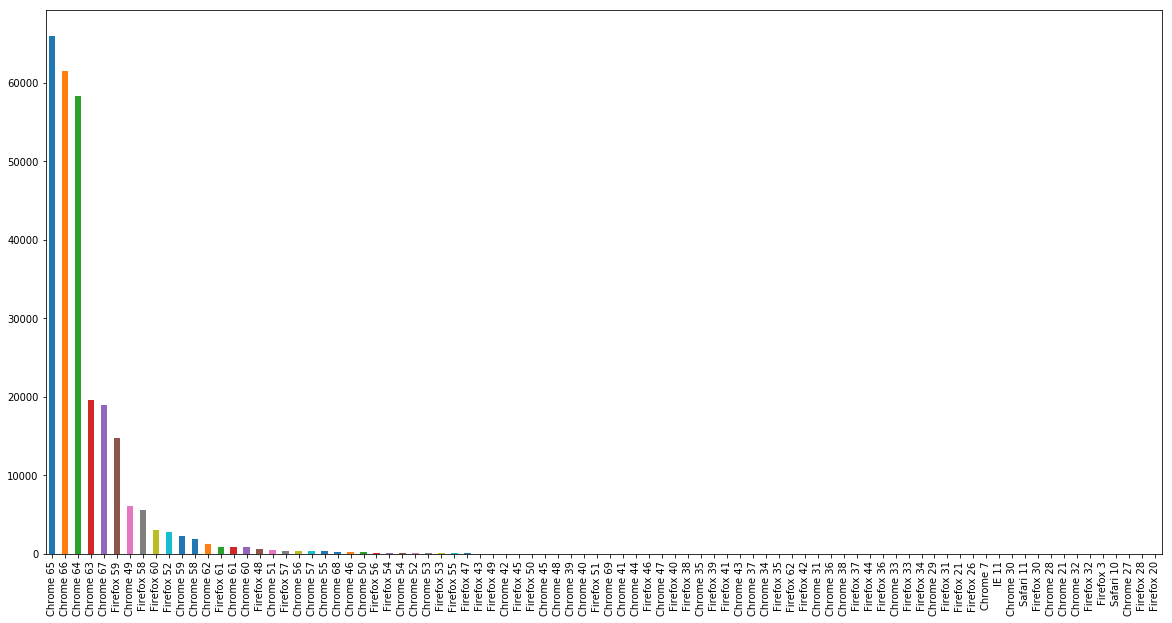

In [42]:
# browser_ver, 86 -> check
cat = 'browser_ver'
df[cat].value_counts().plot(kind='bar', figsize=(20,10))

In [43]:
pp = df.groupby(['browser_ver', 'label'])['browser_ver'].count()
# play a bit more with plotting
pp.unstack('label').sort_values(by=1,ascending=False)#.plot(kind='bar', stacked=True, figsize=(20,10))

label,0,1
browser_ver,,
Chrome 66,59808.0,1671.0
Chrome 65,64529.0,1382.0
Chrome 64,57201.0,1041.0
Chrome 67,18268.0,617.0
Chrome 63,19159.0,410.0
Firefox 59,14405.0,350.0
Chrome 49,6005.0,136.0
Firefox 58,5408.0,122.0
Firefox 60,2955.0,111.0


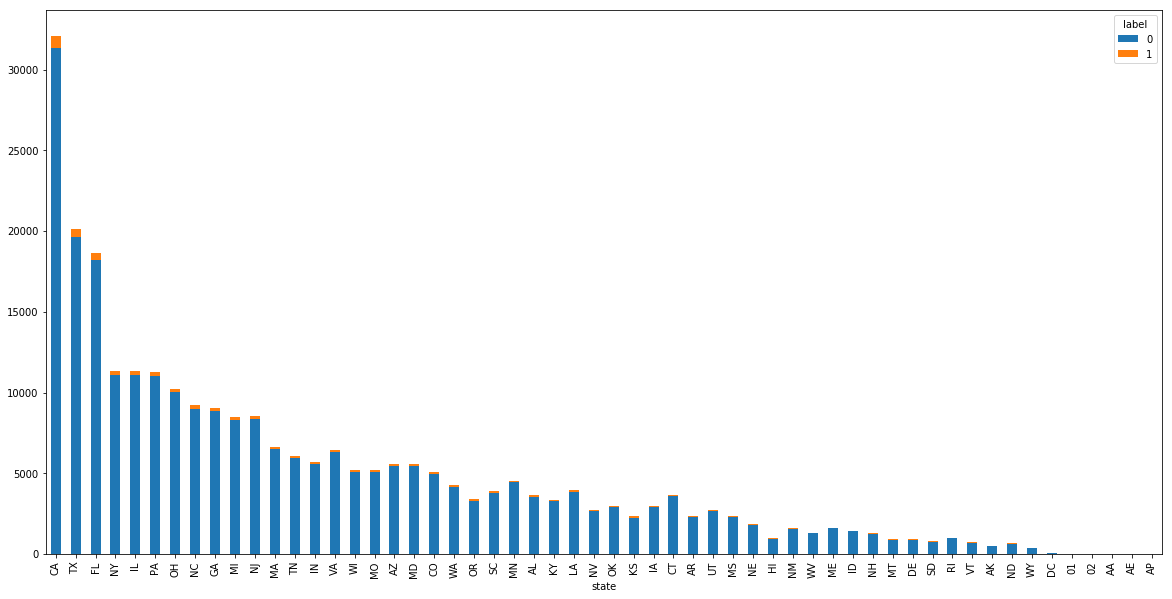

In [44]:
# Distribution of conversion rates (visual) over states
pp = df.groupby(['state', 'label'])['state'].count()
# play a bit more with plotting
pp.unstack('label').sort_values(by=1,ascending=False).plot(kind='bar', stacked=True, figsize=(20,10))

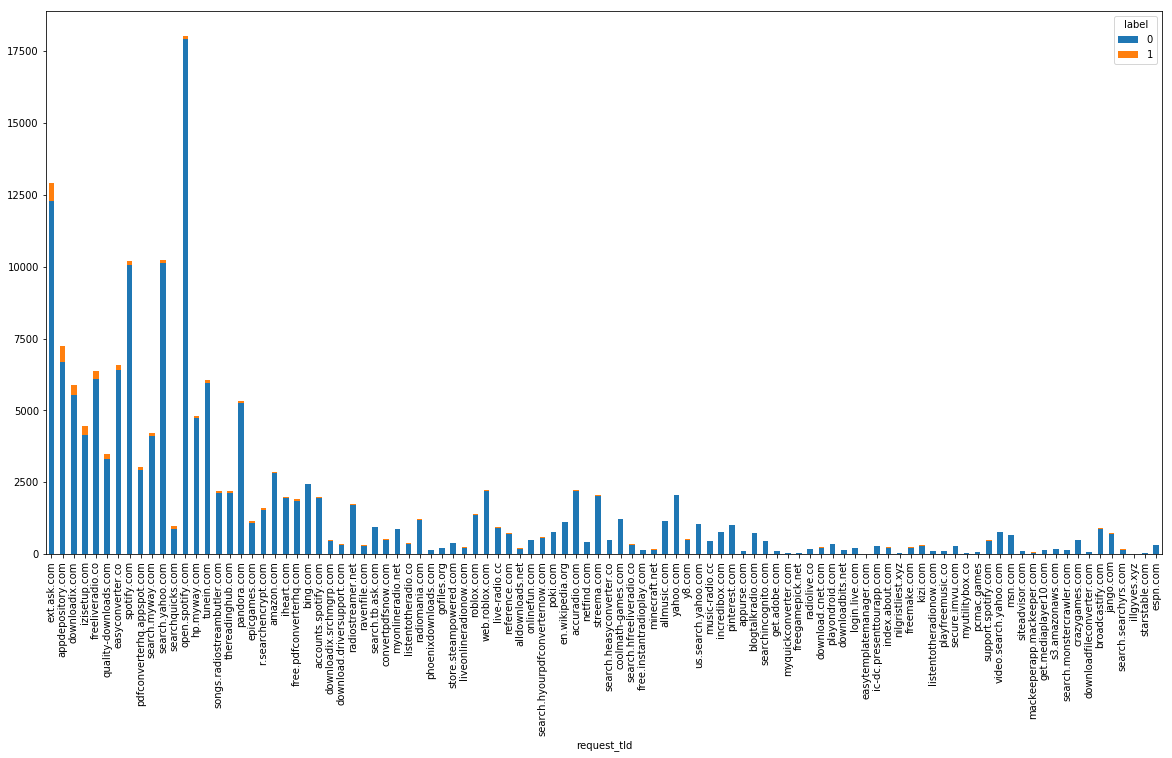

In [45]:
# unsorted/regular plot
# pp = df.groupby(['request_tld', 'label'])['request_tld'].count().sort_values(ascending=False)[0:100]
# pp
# # play a bit more with plotting
# pp.unstack('label').plot(kind='bar', stacked=True, figsize=(20,10))

# sorted plot
pp = df.groupby(['request_tld', 'label'])['request_tld'].count()#.sort_values(ascending=False)[0:100]
# play a bit more with plotting
pp.unstack('label').sort_values(by=1,ascending=False)[0:100].plot(kind='bar', stacked=True, figsize=(20,10))

In [46]:
print(len(df[(df['request_tld'] == 'appdepository.com') & (df['label'] == 1)]))
print(len(df[(df['request_tld'] == 'appdepository.com') & (df['label'] == 0)]))

550
6680


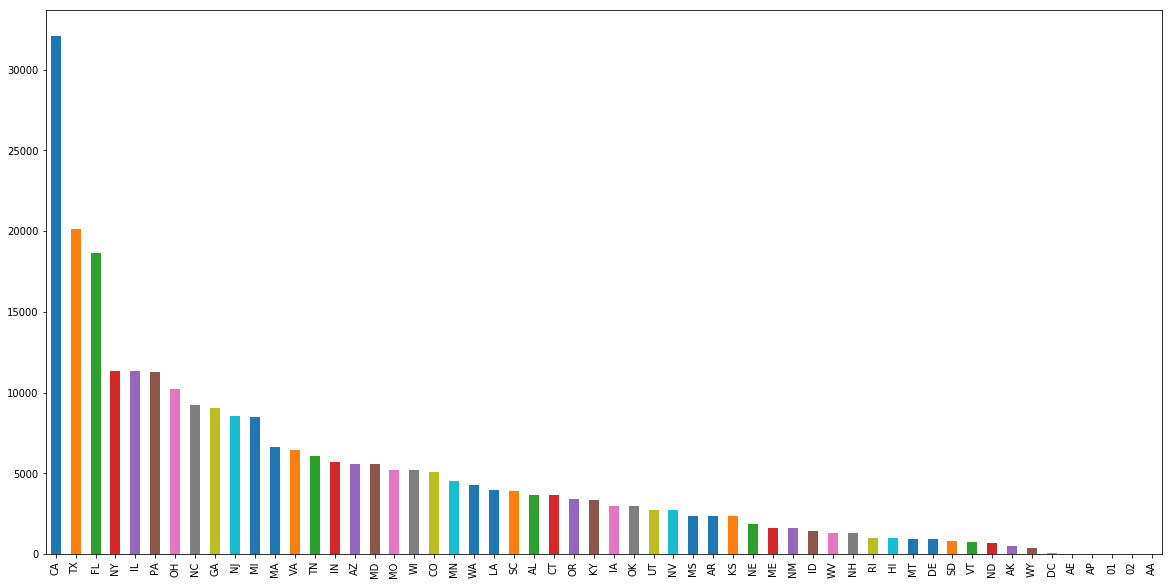

In [47]:
cat = 'state'
df[cat].value_counts().plot(kind='bar', figsize=(20,10))

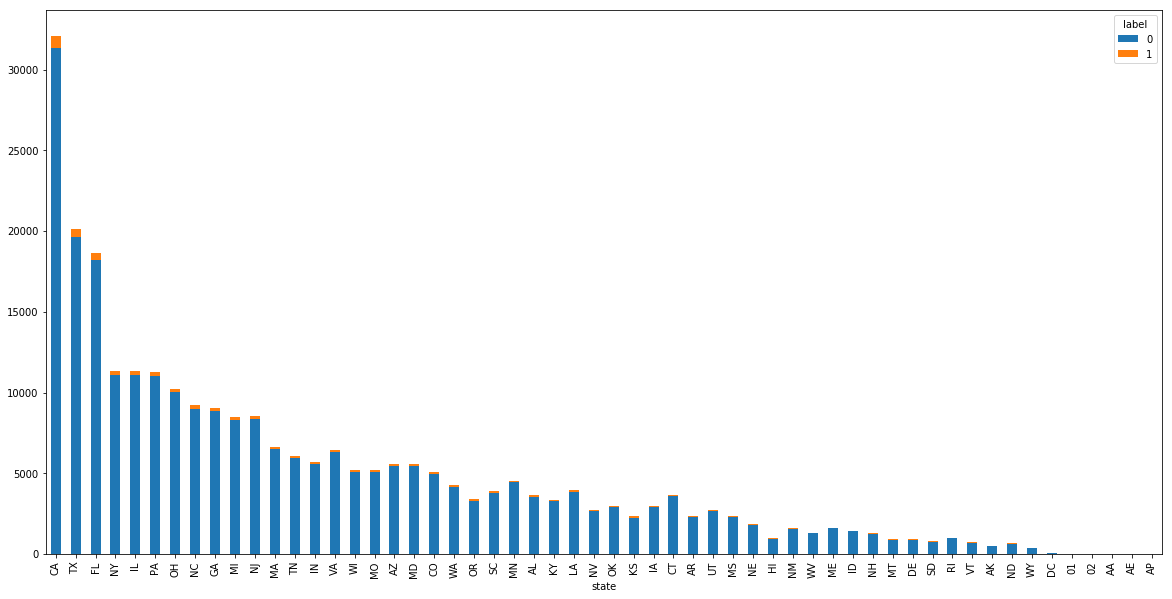

In [48]:
pp = df.groupby(['state', 'label'])['state'].count()
# play a bit more with plotting
pp.unstack('label').sort_values(by=1,ascending=False).plot(kind='bar', stacked=True, figsize=(20,10))

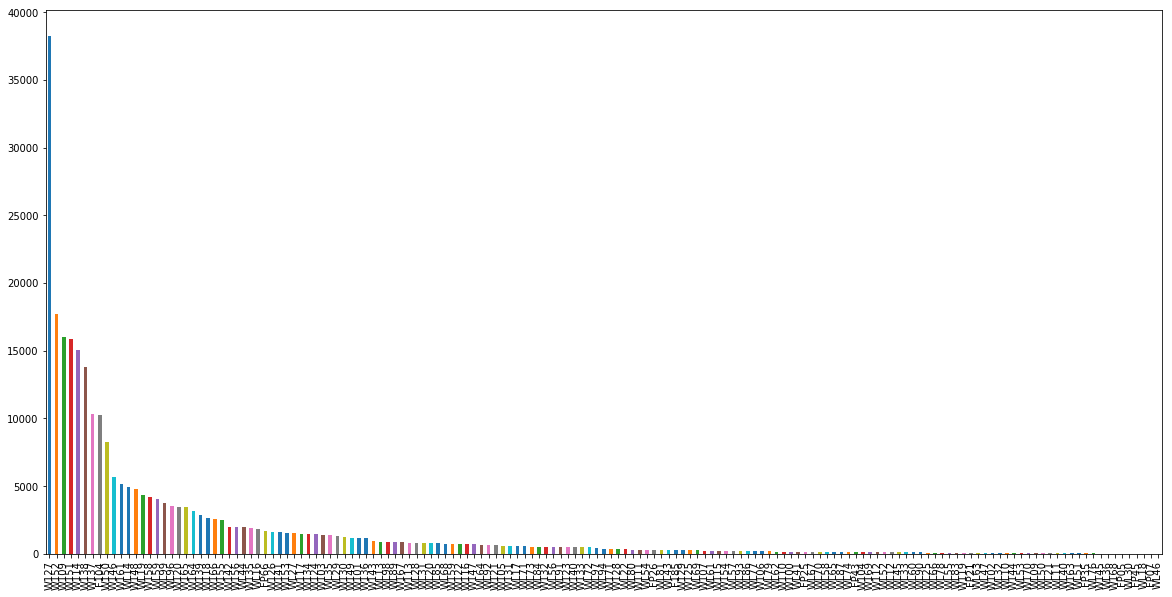

In [49]:
cat = 'network'
df[cat].value_counts().plot(kind='bar', figsize=(20,10))

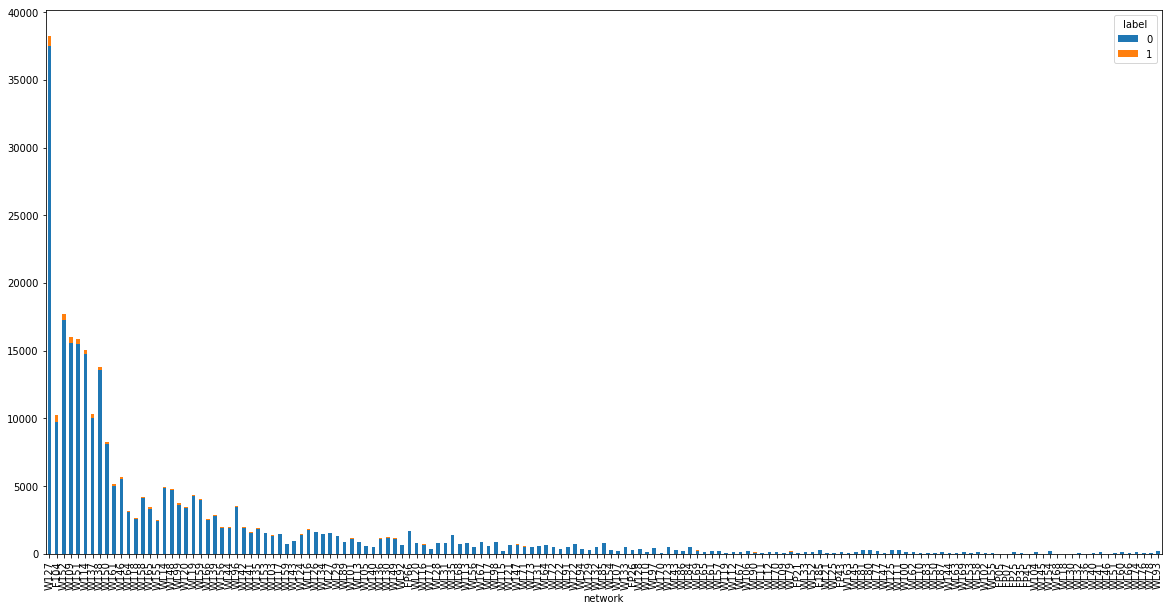

In [50]:
pp = df.groupby(['network', 'label'])['network'].count()
# play a bit more with plotting
pp.unstack('label').sort_values(by=1,ascending=False).plot(kind='bar', stacked=True, figsize=(20,10))

In [58]:
# maybe not needed
df[[cat, 'label']].groupby([cat], as_index=False).agg(['count','mean']).sort_values(by=[('label','count')], ascending=False)

label          
         count      mean
network                 
W127     38230  0.018650
W152     17718  0.026244
W109     16037  0.028871
W151     15886  0.023354
W114     15065  0.020378
W138     13808  0.016585
W137     10323  0.026736
F104     10236  0.046503
W150      8278  0.023919
W146      5685  0.022867
W161      5134  0.026880
WL14      4939  0.018830
W148      4792  0.018990
WL19      4325  0.018960
W158      4207  0.024483
WL59      4054  0.018747
WL99      3731  0.024390
WL96      3509  0.015389
W120      3453  0.024906
W165      3420  0.029532
W164      3171  0.037212
W139      2851  0.021396
W118      2665  0.040150
W166      2563  0.025361
W155      2515  0.036978
W142      1988  0.023642
W156      1968  0.030488
WL44      1959  0.028586
W135      1877  0.020245
WL16      1811  0.016013
...        ...       ...
WL55        82  0.012195
WL83        79  0.012658
W119        72  0.055556
FP21        70  0.042857
WL63        69  0.014493
WL47        63  0.031746
W102        62  0.016129
WL32        61  0.000000
W144        58  0.017241
WL10        58  0.017241
WL53        55  0.018182
W170        55  0.090909
WL09        50  0.060000
WL50        47  0.021277
WL21        42  0.071429
WL11        39  0.076923
WL40        35  0.000000
W163        31  0.064516
WL51        30  0.000000
FP35        26  0.000000
WL76        23  0.000000
W145        18  0.000000
WL36        12  0.000000
W168         9  0.000000
WL30         6  0.000000
FP05         6  0.000000
FP45         5  0.000000
WL18         3  0.000000
FP07         2  0.000000
WL46         1  0.000000

[155 rows x 2 columns]

In [59]:
# maybe not needed
df[['state', 'label']].groupby(['state'], as_index=False).agg(['count','mean']).sort_values(by=[('label','mean')], ascending=False)

label          
       count      mean
state                 
DC        48  0.062500
HI       992  0.038306
AK       485  0.030928
MT       923  0.030336
OR      3405  0.029956
DE       909  0.029703
KS      2329  0.029197
SD       780  0.028205
NV      2721  0.027931
KY      3355  0.025931
SC      3886  0.025733
OK      2975  0.024874
WV      1332  0.024775
WA      4283  0.024749
WI      5182  0.024701
NE      1864  0.024678
AL      3650  0.024658
AR      2332  0.024443
FL     18674  0.024419
NY     11359  0.024386
TX     20135  0.024385
MO      5220  0.024330
IN      5706  0.023484
CA     32071  0.023417
NH      1288  0.023292
IL     11324  0.022695
AZ      5602  0.022670
PA     11294  0.022578
OH     10243  0.022454
GA      9051  0.022428
IA      2990  0.022408
CO      5060  0.022332
ID      1433  0.022331
MD      5567  0.022274
TN      6095  0.022149
VT       725  0.022069
NC      9212  0.022036
MA      6634  0.021556
WY       377  0.021220
MI      8464  0.020794
MN      4533  0.020737
MS      2337  0.020539
NM      1607  0.020535
NJ      8572  0.020532
VA      6445  0.020016
UT      2724  0.019824
RI      1012  0.019763
ND       659  0.019727
ME      1632  0.019608
LA      3947  0.019255
CT      3636  0.018427
02         2  0.000000
AP         9  0.000000
AE        12  0.000000
AA         1  0.000000
01         5  0.000000

In [51]:
# sns.catplot(x="label", y="state", data=df)

# Data wrangling

In [52]:
df_model = df.copy()
print(df_model.shape)
df_model.dropna(inplace=True)
print(df_model.shape)

(268710, 21)
(265689, 21)


In [53]:
# # Transform
# # 'url_category_ids'
# print('url_category_ids, unique values: ',len(df_model['url_category_ids'].unique()))
# uci = df_model['url_category_ids'].apply(lambda x: x.split('|'))
# uci_flat_list = [item for sublist in uci for item in sublist]
# print('url_category_ids, unique list values: ',len(set(uci_flat_list)))

In [54]:
# # Transform
# # 'content_category_ids'
# print('content_category_ids, unique values: ',len(df_model['content_category_ids'].unique()))
# cci = df_model['content_category_ids'].apply(lambda x: x.split('|'))
# cci_flat_list = [item for sublist in cci for item in sublist]
# print('content_category_ids, unique list values: ',len(set(cci_flat_list)))

In [55]:
#Transform TLD
at_least_one = df_model[df_model.label == 1].groupby('request_tld').count().index
df_model['request_tld'] = df_model['request_tld'].apply(lambda x: x if x in at_least_one else 'Others')

In [56]:
# Transform dma
# def transform_dma(x):
#     if x < 450:
#         return 0
#     elif x < 580:
#         return 1
#     elif x < 720:
#         return 2
#     else:
#         return 3
    
# df_model["dma"] = df_model["dma"].apply(transform_dma)

#Simplify Hour
df_model["hour"] = df_model["hour"].apply(lambda x: int(x/4))

#Create Weekend
df_model['day_of_week'] = df_model['day_of_week'].apply(lambda x: 0 if x <= 5 else 1)

# Simplify Browser ver
df_model['browser_ver'] = df_model['browser_ver'].apply(lambda x: x.split()[0])

In [60]:
df_model.sample(10)

,label,advertiser_id,campaign_id,creative_id,keyword_id,country_code,state,dma,organization,browser_ver,...,network,location_id,request_tld,ad_blocker,hour,day_of_week,install_week,content_category_ids,url_category_ids,project_id
211387,0,276,821471,11591213,166714411.0,US,GA,524,Comcast Cable,Chrome,...,W152,6344,downloadix.com,0,4,1,436,0,20006,171
225960,0,276,821471,11591213,158126555.0,US,IN,527,XFINITY WiFi,Chrome,...,W146,6373,messenger.com,0,5,0,436,0,1002,165
183922,0,276,821471,11591213,166632546.0,US,MD,511,Comcast Cable,Firefox,...,W127,6870,Others,0,0,1,428,20031,1007,146
40920,0,276,821471,11591213,4740826.0,US,TX,635,Horseshoe Bay Resort,Chrome,...,W146,6373,Others,0,4,0,435,0,1104,165
139781,0,276,821471,11591213,152240349.0,US,MO,616,Time Warner Cable,Firefox,...,W146,6022,login.aol.com,0,3,0,440,0,20035|20035,165
94752,0,276,821471,11591213,4750040.0,US,CA,803,Time Warner Cable,Firefox,...,W127,6870,iheart.com,0,4,0,434,0,2005|2005,146
200368,0,276,821471,11591213,3830572.0,US,TX,633,Grande Communications,Chrome,...,W127,6758,oneplace.com,1,1,0,434,0,2102,146
249079,0,276,821471,11591213,166620987.0,US,PA,577,Windstream Communications,Chrome,...,W127,6760,search.hfreeliveradio.co,0,1,0,448,0,20031,146
153018,0,276,821471,11591213,11701121.0,US,TX,618,AT&T Internet Services,Chrome,...,W127,6780,Others,0,2,0,429,0,20079,146
25541,0,276,821471,11591985,23288612.0,US,IN,602,City of Valparaiso City hall,Chrome,...,W120,5705,accuradio.com,0,2,0,381,0,1104,139


In [61]:
# COLUMN selection - keep only the ones that will be used/converted for the final model
fixed_drop_columns = ['advertiser_id','campaign_id','country_code','content_category_ids','url_category_ids','project_id']
temp_drop_columns = ['url_category_ids', 'content_category_ids', 'location_id','organization' ] #'request_tld'
sel_drop_columns = [] #'platform','network',organization','browser_ver'

drop_columns = fixed_drop_columns + temp_drop_columns + sel_drop_columns

df_model.drop(drop_columns, axis=1, inplace=True)
df_model.shape

(265689, 13)

## Categorical

In [62]:
num_cols = ['install_week','dma']
# categorical to numerical
cat_cols = ['creative_id','keyword_id','state','browser_ver','platform','network','ad_blocker','hour','day_of_week','request_tld']
#'location_id','request_tld', 'organization'
cat_to_num = df_model[cat_cols].select_dtypes(include=[np.number]).columns
print(cat_to_num)
df_model[cat_to_num] = df_model[cat_to_num].applymap(str)

Index(['creative_id', 'keyword_id', 'ad_blocker', 'hour', 'day_of_week'], dtype='object')


In [63]:
df_model.apply(lambda x: x.nunique(), axis=0)

label              2
creative_id        5
keyword_id       213
state             56
dma              211
browser_ver        2
platform          11
network          155
request_tld     1238
ad_blocker         2
hour               6
day_of_week        2
install_week     148
dtype: int64

In [64]:
%%time
# get_dummies all categorical columns
df_model = pd.concat([df_model[['label'] + num_cols], pd.get_dummies(df_model[cat_cols], drop_first=True)], axis=1)

CPU times: user 6.82 s, sys: 969 ms, total: 7.79 s
Wall time: 7.95 s


In [65]:
df_model.shape

(265689, 1683)

# Modeling

## Data preparation

In [66]:
# undersampling so that class 0 has same number as class 1

# num_conv = len(df_model[df_model['label'] == 1])
# df_model_us = pd.concat([df_model[df_model['label'] == 1],df_model[df_model['label'] == 0].sample(n=num_conv)])

# undersampling so that imbalance remains the same

# desired_dataset_len = 1000
# class_0_len = int(desired_dataset_len/imbalance_weight)
# class_1_len = desired_dataset_len - class_0_len
# class_0_ds = df_model[df_model['label'] == 1].sample(class_0_len)
# class_1_ds = df_model[df_model['label'] == 0].sample(class_1_len)
# df_model_us = pd.concat([class_0_ds,class_1_ds])
# print(len(df_model_us[df_model_us['label'] == 1]),len(df_model_us[df_model_us['label'] == 0]))

# full dataset
X = df_model.iloc[:,1:]
y = df_model.iloc[:,0]

# reduced dataset
# X = df_model_us.iloc[:,1:]
# y = df_model_us.iloc[:,0]
# X_full = df_model.iloc[:,1:]
# y_full = df_model.iloc[:,0]

In [67]:
#Scaling
scaler = StandardScaler().fit(df_model.loc[:,num_cols])
df_model.loc[:,num_cols] = scaler.transform(df_model.loc[:,num_cols])

In [68]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(212551, 1682) (53138, 1682) (212551,) (53138,)
CPU times: user 1.25 s, sys: 291 ms, total: 1.54 s
Wall time: 1.59 s


In [69]:
print('y_train:', y_train.sum(),', y_test:', y_test.sum())

y_train: 4850 , y_test: 1213


In [70]:
def generate_model_report(model_name, cv_model):
    
    train_scores_single = []
    
    for i in range(cv_num):
        train_scores_single.append(np.max(cvmodel.cv_results_['split' + str(i) + '_test_score']))

    print('model: ', model_name)
    print('model params: ', cvmodel.best_params_)
    print('--------------')
    print('scoring method: ', scoring_method)
    print('train scores: ', train_scores_single)
    print('train scores, mean: ', np.array(train_scores_single).mean())
    test_score_single = f1_score(y_test, y_test_pred)  
    print('test score: ', test_score_single)
    print('--------------')
    print('test set - classification report: ')
    cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
    sns.heatmap(cnf_matrix,annot=True, fmt="10.0f")
    print(classification_report(y_test, y_test_pred, digits=3))
    
    return train_scores_single, test_score_single

# Training

In [71]:
# scores = {}
# cv_scores = {}
train_scores = {}
test_scores = {}
model_names = []

In [72]:
scoring_method = 'f1'
cv_num = 5

## Logistic regression

In [ ]:
%%time
# Logistic Regression
model_name = 'LogReg'
if model_name not in model_names:
    model_names.append(model_name)

mlmodel = LogisticRegression()

# Full grid search
C = [0.01,0.1,1]
class_weight=['balanced',{0:1, 1:imbalance_weight/2.5},{0:1, 1:imbalance_weight/2},{0:1, 1:imbalance_weight/3}]

# Test grid search
# C = [0.01]
# class_weight = [{0:1, 1:imbalance_weight/2}]

# DEV options
# hyperparameters = dict(C=C,class_weight=class_weight)
# TEST options
hyperparameters = dict(C=[0.1],class_weight=['balanced'])

# skf = StratifiedKFold(n_splits=5, random_state=42)
cvmodel = GridSearchCV(mlmodel, hyperparameters, cv=cv_num, verbose=10, scoring=scoring_method, return_train_score=False)
cvmodel.fit(X_train,y_train)
# predict validation(test) set
y_test_pred = cvmodel.predict(X_test)
y_test_proba = cvmodel.predict_proba(X_test)
all_done()

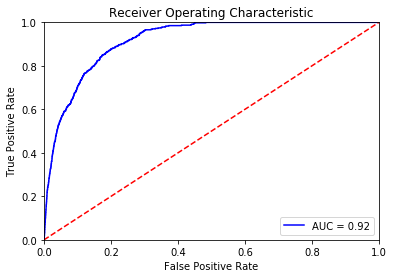

In [404]:
# calculate the fpr and tpr for all thresholds of the classification
preds = y_test_proba[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_test_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}')

model:  LogReg
model params:  {'C': 0.1, 'class_weight': {0: 1, 1: 117.85666666666667}}
--------------
scoring method:  f1
train scores:  [0.05543710021321962, 0.05275374551593163, 0.049560680944535966]
train scores, mean:  0.05258384222456241
test score:  0.05127255900046275
--------------
test set - classification report: 
             precision    recall  f1-score   support

          0      0.999     0.939     0.968    165086
          1      0.027     0.592     0.051       468

avg / total      0.996     0.938     0.965    165554



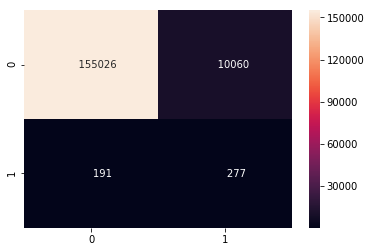

In [411]:
train_scores[model_name], test_scores[model_name] = generate_model_report(model_name, cvmodel)

## Decision Tree

In [245]:
# %%time
# # Decision Tree
# model_name = 'Decision Tree'
# if model_name not in model_names:
#     model_names.append(model_name)

# mlmodel = DecisionTreeClassifier()

# # Full grid search
# class_weight = ['balanced', {0:1, 1:imbalance_weight/2},{0:1, 1:imbalance_weight},{0:1, 1:2*imbalance_weight}]

# # Test grid search
# # class_weight = ['balanced']

# # testing options
# hyperparameters = dict(class_weight=class_weight)

# cvmodel = GridSearchCV(mlmodel, hyperparameters, cv=cv_num, verbose=10, scoring=scoring_method, return_train_score=False)
# cvmodel.fit(X_train,y_train)

# # predict validation(test) set
# y_test_pred = cvmodel.predict(X_test)
# y_test_proba = cvmodel.predict_proba(X_test)
# all_done()

In [246]:
# # GENERATE REPORT
# train_scores[model_name], test_scores[model_name] = generate_model_report(model_name, cvmodel)

## Naive Bayes

In [376]:
%%time
# Naive Bayes
model_name = 'NB'
if model_name not in model_names:
    model_names.append(model_name)

mlmodel = BernoulliNB()
# mlmodel = GaussianNB()

# Full grid search
# class_weight = [{0:1, 1:15}]

# Test grid search
cp_range = np.round(np.arange(0.0, 1.1, 0.1),2)
class_prior = list(zip(cp_range,reversed(cp_range)))

# testing options
# hyperparameters = dict(class_prior=class_prior)
hyperparameters = dict(class_prior=[(0.85,0.15)])

cvmodel = GridSearchCV(mlmodel, hyperparameters, cv=cv_num, verbose=10, scoring=scoring_method, return_train_score=False)
cvmodel.fit(X_train,y_train)

# predict validation(test) set
y_test_pred = cvmodel.predict(X_test)
y_test_proba = cvmodel.predict_proba(X_test)
all_done()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] class_prior=(0.85, 0.15) ........................................
[CV]  class_prior=(0.85, 0.15), score=0.1278559889222248, total=  20.5s
[CV] class_prior=(0.85, 0.15) ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s remaining:    0.0s


[CV]  class_prior=(0.85, 0.15), score=0.14468690702087286, total=  19.0s
[CV] class_prior=(0.85, 0.15) ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.6s remaining:    0.0s


[CV]  class_prior=(0.85, 0.15), score=0.13475836431226765, total=  19.1s
[CV] class_prior=(0.85, 0.15) ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.7s remaining:    0.0s


[CV]  class_prior=(0.85, 0.15), score=0.14583811052510892, total=  18.9s
[CV] class_prior=(0.85, 0.15) ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV]  class_prior=(0.85, 0.15), score=0.1321444901691815, total=  18.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


CPU times: user 1min 41s, sys: 28.6 s, total: 2min 9s
Wall time: 2min 4s


model:  NB
model params:  {'class_prior': (0.85, 0.15)}
--------------
scoring method:  f1
train scores:  [0.1278559889222248, 0.14468690702087286, 0.13475836431226765, 0.14583811052510892, 0.1321444901691815]
train scores, mean:  0.13705677218993112
test score:  0.14380453752181502
--------------
test set - classification report: 
             precision    recall  f1-score   support

          0      0.984     0.921     0.951     51925
          1      0.091     0.340     0.144      1213

avg / total      0.963     0.908     0.933     53138



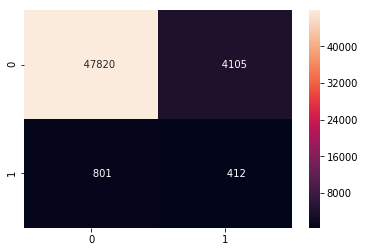

In [371]:
# GENERATE REPORT
train_scores[model_name], test_scores[model_name] = generate_model_report(model_name, cvmodel)

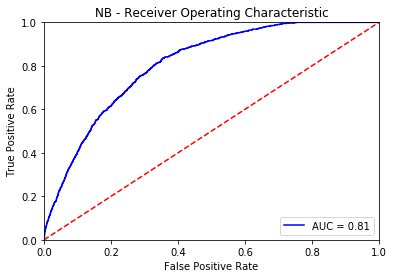

In [378]:
# calculate the fpr and tpr for all thresholds of the classification
preds = y_test_proba[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title(model_name + ' - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost

In [ ]:
# # %%time
# # XGB
# model_name = 'XGB'
# if model_name not in model_names:
#     model_names.append(model_name)

# mlmodel = XGBClassifier()

# # Full grid search
# # class_weight = [{0:1, 1:15}]

# # testing options
# hyperparameters = {}
# # hyperparameters = dict(class_prior=[(0.85,0.15)])
# cvk = StratifiedKFold(5, shuffle=True)
# cvmodel = GridSearchCV(mlmodel, hyperparameters, cv=cvk, verbose=10, scoring=scoring_method, return_train_score=False)
# cvmodel.fit(X_train,y_train)

# # predict validation(test) set
# y_test_pred = cvmodel.predict(X_test)
# y_test_proba = cvmodel.predict_proba(X_test)
# all_done()

In [ ]:
# # GENERATE REPORT
# train_scores[model_name], test_scores[model_name] = generate_model_report(model_name, cvmodel)

## Random Forest

In [373]:
## %%time
# Random Forest
model_name = 'Random Forest'

if model_name not in model_names:
    model_names.append(model_name)

mlmodel = RandomForestClassifier()

# DEV options
hyperparameters = dict(class_weight=['balanced',{0:1, 1:imbalance_weight/3}], n_estimators = [20], max_depth=[20])
# TEST options
# hyperparameters = dict(class_weight=[{0:1, 1:imbalance_weight/2},{0:1, 1:imbalance_weight/3},{0:1, 1:imbalance_weight/4}], n_estimators = [20], max_depth=[20])

# skf = StratifiedKFold(n_splits=5, random_state=42)
cvmodel = GridSearchCV(mlmodel, hyperparameters, cv=cv_num, verbose=10, scoring=scoring_method, return_train_score=False)
cvmodel.fit(X_train,y_train)
# predict validation(test) set
y_test_pred = cvmodel.predict(X_test)
y_test_proba = cvmodel.predict_proba(X_test)
all_done()

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] class_weight=balanced, max_depth=20, n_estimators=20 ............
[CV]  class_weight=balanced, max_depth=20, n_estimators=20, score=0.09278350515463919, total=  14.7s
[CV] class_weight=balanced, max_depth=20, n_estimators=20 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s remaining:    0.0s


[CV]  class_weight=balanced, max_depth=20, n_estimators=20, score=0.09752709085857181, total=  14.4s
[CV] class_weight=balanced, max_depth=20, n_estimators=20 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.1s remaining:    0.0s


[CV]  class_weight=balanced, max_depth=20, n_estimators=20, score=0.09292442807564276, total=  14.6s
[CV] class_weight=balanced, max_depth=20, n_estimators=20 ............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.8s remaining:    0.0s


[CV]  class_weight=balanced, max_depth=20, n_estimators=20, score=0.09073792894017613, total=  13.8s
[CV] class_weight=balanced, max_depth=20, n_estimators=20 ............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   57.6s remaining:    0.0s


[CV]  class_weight=balanced, max_depth=20, n_estimators=20, score=0.09437621202327084, total=  13.6s
[CV] class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s


[CV]  class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20, score=0.061891043278412584, total=  14.5s
[CV] class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s


[CV]  class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20, score=0.05868256114046946, total=  14.2s
[CV] class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.7min remaining:    0.0s


[CV]  class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20, score=0.0616313035662697, total=  13.9s
[CV] class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.9min remaining:    0.0s


[CV]  class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20, score=0.05137208297320657, total=  14.3s
[CV] class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.1min remaining:    0.0s


[CV]  class_weight={0: 1, 1: 117.85666666666667}, max_depth=20, n_estimators=20, score=0.0625367959704324, total=  13.6s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished


model:  Random Forest
model params:  {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 20}
--------------
scoring method:  f1
train scores:  [0.09278350515463919, 0.09752709085857181, 0.09292442807564276, 0.09073792894017613, 0.09437621202327084]
train scores, mean:  0.09366983301046014
test score:  0.09444955535111928
--------------
test set - classification report: 
             precision    recall  f1-score   support

          0      0.992     0.664     0.796     51925
          1      0.050     0.762     0.094      1213

avg / total      0.970     0.667     0.780     53138



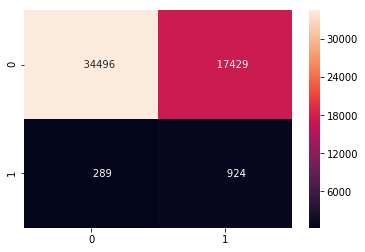

In [374]:
# GENERATE REPORT
train_scores[model_name], test_scores[model_name] = generate_model_report(model_name, cvmodel)

## Random Forest - individual search of the parameters

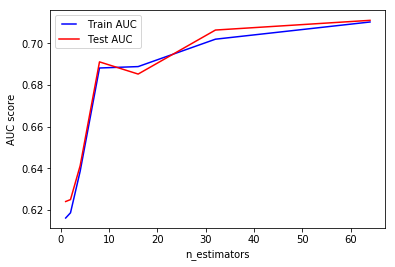

CPU times: user 1min 10s, sys: 23.7 s, total: 1min 34s
Wall time: 54.3 s


In [90]:
%%time
# plot of auc score and n_estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, verbose=0, class_weight='balanced', max_depth=5, random_state=42)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

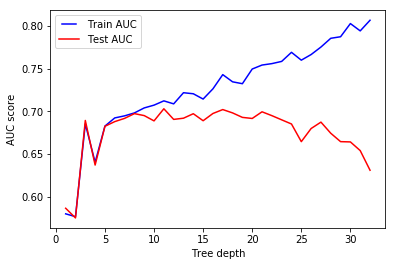

CPU times: user 9min 50s, sys: 1min 46s, total: 11min 37s
Wall time: 4min 58s


In [99]:
%%time
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, class_weight='balanced')
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

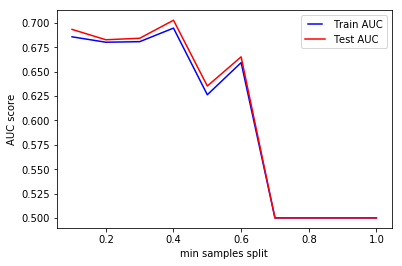

CPU times: user 38.1 s, sys: 30 s, total: 1min 8s
Wall time: 1min 8s


In [100]:
%%time
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split, class_weight='balanced', max_depth=7)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

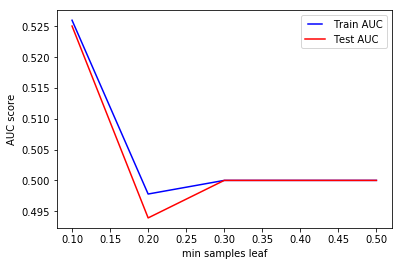

CPU times: user 15.3 s, sys: 14.6 s, total: 29.9 s
Wall time: 30 s


In [101]:
%%time
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, class_weight='balanced', max_depth=7)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [763]:
dfy = pd.DataFrame(
    {'prediction': y_test_pred,
     'p_class_0': y_test_proba[:,0],
     'p_class_1': y_test_proba[:,1],
     'truth': y_test
    })
# dfy[dfy['prediction'] != dfy['truth']]

,p_class_0,p_class_1,prediction,truth
16615,0.927922,0.072078,0,1
45055,0.983617,0.016383,0,1
196213,0.976168,0.023832,0,1
191120,0.865866,0.134134,0,1
259189,0.983038,0.016962,0,1


In [532]:
print(train_scores)
print(test_scores)
print(model_names)

{'LogReg': [0.10293867844402921, 0.10840932117527863, 0.1029940119760479, 0.10335195530726257, 0.11591665207494309, 0.09897723523589576, 0.11623455716025752, 0.10657871897240061, 0.10952063914780293, 0.10238907849829351], 'Decision Tree': [0.06948356807511738, 0.0732936326156665, 0.07152682255845942, 0.08256029684601113, 0.07628676470588235, 0.08022130013831258, 0.08679593721144968, 0.06957328385899814, 0.08469055374592833, 0.07903300790330078], 'NB': [0.11455847255369929, 0.1251908396946565, 0.11368297685320831, 0.10117939168218498, 0.11808346213292116, 0.12304921968787516, 0.13657623947614592, 0.11597704620960435, 0.11343097538173887, 0.10401459854014598]}
{'LogReg': 0.11015911872705018, 'Decision Tree': 0.07525172231054583, 'NB': 0.12372103963307066}
['LogReg', 'Decision Tree', 'NB']


## Box plot of all train scores

[Text(0,0,'LogReg'), Text(0,0,'NB'), Text(0,0,'Random Forest')]

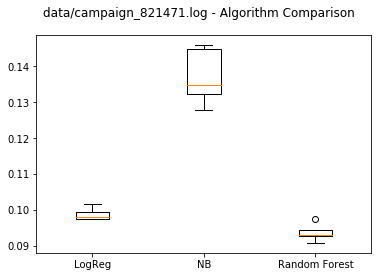

In [375]:
boxplot_data = []
for mn in model_names:
    boxplot_data.append(train_scores[mn])

fig = plt.figure()
fig.suptitle(filepath + ' - Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(boxplot_data)
ax.set_xticklabels(model_names)

In [534]:
df_report = pd.DataFrame.from_dict(train_scores, orient='index')
df_report

,0,1,2,3,4,5,6,7,8,9
LogReg,0.102939,0.108409,0.102994,0.103352,0.115917,0.098977,0.116235,0.106579,0.109521,0.102389
Decision Tree,0.069484,0.073294,0.071527,0.082560,0.076287,0.080221,0.086796,0.069573,0.084691,0.079033
NB,0.114558,0.125191,0.113683,0.101179,0.118083,0.123049,0.136576,0.115977,0.113431,0.104015


In [535]:
df_report['test_scores'] = test_scores.values()

In [538]:
df_report.columns = ['train_0','train_1','train_2','train_3','train_4','train_5','train_6','train_7','train_8','train_9','test_scores']

In [539]:
cols = df_report.loc[:,'train_0':'train_9']
# col = df.loc[: , "salary_1":"salary_3"]
df_report['train_mean'] = cols.mean(axis=1)

In [540]:
df_report

,train_0,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,test_scores,train_mean
LogReg,0.102939,0.108409,0.102994,0.103352,0.115917,0.098977,0.116235,0.106579,0.109521,0.102389,0.110159,0.106731
Decision Tree,0.069484,0.073294,0.071527,0.082560,0.076287,0.080221,0.086796,0.069573,0.084691,0.079033,0.075252,0.077347
NB,0.114558,0.125191,0.113683,0.101179,0.118083,0.123049,0.136576,0.115977,0.113431,0.104015,0.123721,0.116574


In [448]:
df_report_save = df_report.copy()

In [553]:
test_scores

{'Decision Tree': 0.07525172231054583,
 'LogReg': 0.11015911872705018,
 'NB': 0.12372103963307066}

In [554]:
max(test_scores, key=test_scores.get)

'NB'

# MISC CODE not used

## numerical columns

In [612]:
#### TEST #####
df_model = df.copy()
# for testing purposes, keeping only numerical ones

# NUMERICAL ONLY
# df_model = df[['label','creative_id','keyword_id','dma','location_id','ad_blocker','hour','day_of_week','install_week','project_id']].copy()

In [613]:
print(df_model.shape)
df_model.dropna(inplace=True)
print(df_model.shape)

(268710, 21)
(265689, 21)


In [ ]:
# print('class 0:', len(df_model[df_balanced['label'] == 0]))
# print('class 1:', len(df_model[df_balanced['label'] == 1]))

In [443]:
df.columns

Index(['label', 'advertiser_id', 'campaign_id', 'creative_id', 'keyword_id',
       'country_code', 'state', 'dma', 'organization', 'browser_ver',
       'platform', 'network', 'location_id', 'request_tld', 'ad_blocker',
       'hour', 'day_of_week', 'install_week', 'content_category_ids',
       'url_category_ids', 'project_id'],
      dtype='object')

In [423]:
# country_code -> drop
# state, 56 -> check -> convert
# organization, 4896 -> check -> keep 20, rare 15%
# browser_ver, 86 -> check -> keep 25, rare 8%
# platform, 11 -> convert
# network, 155 -> check -> keep 25, rare 26%

## Column selection

In [614]:
# COLUMN selection - keep only the ones that will be used/converted for the final model
fixed_drop_columns = ['campaign_id','advertiser_id','country_code']
temp_drop_columns = ['content_category_ids','url_category_ids']
sel_drop_columns = [] #'platform','network',organization','browser_ver'

drop_columns = fixed_drop_columns + temp_drop_columns + sel_drop_columns

df_model.drop(drop_columns, axis=1, inplace=True)
df_model.shape

(265689, 16)

In [615]:
df_model.head()

,label,creative_id,keyword_id,state,dma,organization,browser_ver,platform,network,location_id,request_tld,ad_blocker,hour,day_of_week,install_week,project_id
0,0,11591213,43223832.0,NJ,501,Optimum Online,Chrome 63,Windows,W127,6871,search.yahoo.com,0,3,4,418,146
1,0,11591213,65162591.0,NY,526,Time Warner Cable,Chrome 63,Windows,WL19,0,listenradios.com,0,3,4,320,0
3,0,11597005,2257363.0,CA,862,AT&T U-verse,Chrome 63,Windows,W103,4497,ebay.com,0,0,4,430,122
4,0,11591213,43223832.0,IL,632,Hamilton County Communications,Chrome 63,Mac OS X,W127,6758,bing.com,0,2,4,416,146
5,0,11591213,157780014.0,OH,510,AT&T U-verse,Firefox 58,Windows,WL89,0,wksu.org,0,3,4,430,0


In [616]:
df_model.shape

(265689, 16)

## categorical features conversion

In [617]:
%%time
# request_tld, ~ -> check -> keep 50, rare ~%

cat = 'request_tld'
cutoff = 50
# forming Rare value
conversion_to_rare = df[cat].value_counts()[cutoff+1:].index.tolist()
df_model[[cat]] = df_model[[cat]].replace(to_replace=conversion_to_rare, value='Rare')

# one hot encoding
df_model = pd.concat([df_model,pd.get_dummies(df_model[cat], prefix=cat, drop_first=True)],axis=1)
df_model.drop([cat], axis=1, inplace=True)

CPU times: user 1min 29s, sys: 585 ms, total: 1min 30s
Wall time: 1min 31s


In [618]:
# state, 56 -> check -> convert
# simple conversion
cat = 'state'
df_model = pd.concat([df_model,pd.get_dummies(df_model[cat], prefix=cat, drop_first=True)],axis=1)
df_model.drop([cat], axis=1, inplace=True)

In [619]:
%%time
# organization, 4896 -> check -> keep 20, rare 15%

cat = 'organization'
cutoff = 20
# forming Rare value
conversion_to_rare = df[cat].value_counts()[cutoff+1:].index.tolist()
df_model[[cat]] = df_model[[cat]].replace(to_replace=conversion_to_rare, value='Rare')

# one hot encoding
df_model = pd.concat([df_model,pd.get_dummies(df_model[cat], prefix=cat, drop_first=True)],axis=1)
df_model.drop([cat], axis=1, inplace=True)

CPU times: user 16.9 s, sys: 178 ms, total: 17.1 s
Wall time: 17.2 s


In [620]:
%%time
# browser_ver, 86 -> check -> keep 25, rare 8%

cat = 'browser_ver'
cutoff = 25
# forming Rare value
conversion_to_rare = df[cat].value_counts()[cutoff+1:].index.tolist()
df_model[[cat]] = df_model[[cat]].replace(to_replace=conversion_to_rare, value='Rare')

# one hot encoding
df_model = pd.concat([df_model,pd.get_dummies(df_model[cat], prefix=cat, drop_first=True)],axis=1)
df_model.drop([cat], axis=1, inplace=True)

CPU times: user 445 ms, sys: 77.3 ms, total: 522 ms
Wall time: 528 ms


In [621]:
# platform, 11 -> convert
# simple conversion
cat = 'platform'
df_model = pd.concat([df_model,pd.get_dummies(df_model[cat], prefix=cat, drop_first=True)],axis=1)
df_model.drop([cat], axis=1, inplace=True)

In [622]:
%%time
# network, 155 -> check -> keep 25, rare 26%

cat = 'network'
cutoff = 25
# forming Rare value
conversion_to_rare = df[cat].value_counts()[cutoff+1:].index.tolist()
df_model[[cat]] = df_model[[cat]].replace(to_replace=conversion_to_rare, value='Rare')

# one hot encoding
df_model = pd.concat([df_model,pd.get_dummies(df_model[cat], prefix=cat, drop_first=True)],axis=1)
df_model.drop([cat], axis=1, inplace=True)

CPU times: user 821 ms, sys: 92.3 ms, total: 914 ms
Wall time: 919 ms


In [623]:
print(df_model.shape)
print(df_model.columns)

(265689, 199)
Index(['label', 'creative_id', 'keyword_id', 'dma', 'location_id',
       'ad_blocker', 'hour', 'day_of_week', 'install_week', 'project_id',
       ...
       'network_W158', 'network_W161', 'network_W164', 'network_W165',
       'network_W166', 'network_WL14', 'network_WL19', 'network_WL59',
       'network_WL96', 'network_WL99'],
      dtype='object', length=199)


# Modeling

In [624]:
df_model_us = pd.concat([df_model[df_model['label'] == 1],df_model[df_model['label'] == 0].sample(n=6230)])

# full dataset
x = df_model.iloc[:,1:]
y = df_model.iloc[:,0]

# reduced dataset
x_us = df_model_us.iloc[:,1:]
y_us = df_model_us.iloc[:,0]

In [625]:
print(len(x), len(y))
print(len(x_us), len(y_us))

265689 265689
12293 12293


In [626]:
print(x.head())
print(y.head())

   creative_id   keyword_id  dma  location_id  ad_blocker  hour  day_of_week  \
0     11591213   43223832.0  501         6871           0     3            4   
1     11591213   65162591.0  526            0           0     3            4   
3     11597005    2257363.0  862         4497           0     0            4   
4     11591213   43223832.0  632         6758           0     2            4   
5     11591213  157780014.0  510            0           0     3            4   

   install_week  project_id  request_tld_accounts.spotify.com      ...       \
0           418         146                                 0      ...        
1           320           0                                 0      ...        
3           430         122                                 0      ...        
4           416         146                                 0      ...        
5           430           0                                 0      ...        

   network_W158  network_W161  network_W164 

In [627]:
# scoring variables

scores = {}
cv_scores = {}

## predictions vs probabilities

In [630]:
print(y_pred)
print(y_proba)
dfy = pd.DataFrame(
    {'prediction': y_pred,
     'p_class_0': y_proba[:,0],
     'p_class_1': y_proba[:,1],
     'truth': y
    })


[0 0 0 ... 0 0 0]
[[0.64765246 0.35234754]
 [0.60781098 0.39218902]
 [0.71793667 0.28206333]
 ...
 [0.60784214 0.39215786]
 [0.64764772 0.35235228]
 [0.60795859 0.39204141]]


In [631]:
dfy[dfy['prediction'] != dfy['truth']]

,p_class_0,p_class_1,prediction,truth
5,0.426914,0.573086,1,0
28,0.426485,0.573515,1,0
30,0.647653,0.352347,0,1
38,0.426315,0.573685,1,0
46,0.426324,0.573676,1,0
51,0.426330,0.573670,1,0
68,0.426315,0.573685,1,0
82,0.426382,0.573618,1,0
85,0.426207,0.573793,1,0
88,0.426266,0.573734,1,0
